In [1]:
#importing necessary python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#setting the right directory
os.chdir('C:\\Users\\U0033207PC\\Desktop\\GENE Enrichment\\FINAL VISUALISATION\\ANALYTICS\CLUSTERING')

In [3]:
# Importing the dataset
dt = pd.read_csv('FLUX_REACTIONS.csv')

In [4]:
dt

,HUG0_SYMBOL,FACOAL161,FACOAL226,FAOXC180x,FAOXC200180x,LPS2e,FAOXC22C20x,FAOXC5C5OHm,FOLR2,MTHFC,MTHFD2,MTHFDm,MTHFR3,PGI,GAPD,LDH_L,PGK,PGM,OverallSurvivalMonths
0,TCGA-05-4244-01,492.278261,7.079644,72.493260,72.493260,61.853054,73.132205,738.255400,108.397948,270.354130,56.871599,297.748823,140.623096,1030.983679,1166.701897,762.687695,1166.701897,749.960368,0.00
1,TCGA-05-4249-01,310.135139,9.551541,56.620656,56.620656,140.936419,56.620656,652.096490,48.449442,382.299940,161.789575,167.948581,53.053610,948.109309,597.786528,205.141506,597.786528,631.433024,50.03
2,TCGA-05-4250-01,469.075416,7.079644,16.444642,16.444642,141.025689,16.444642,702.829700,96.069113,238.709350,36.999800,351.986493,74.714500,928.460497,736.258582,586.017733,736.258582,976.578815,3.98
3,TCGA-05-4382-01,388.931756,2.566599,57.663478,57.663478,143.147092,57.663478,672.085332,45.966676,411.693304,166.922048,189.198139,52.530859,1229.347764,827.567914,196.688284,827.567914,1051.613598,19.94
4,TCGA-05-4384-01,370.985877,14.063856,55.165456,55.165456,234.667633,55.165456,803.016266,94.298178,270.281991,91.494424,194.522383,107.434150,742.146537,751.875531,227.911782,751.875531,707.795001,13.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,TCGA-NJ-A55O-01,414.746888,39.822528,85.618963,85.618963,36.750627,85.618963,982.765609,53.142165,471.778643,204.275029,173.381863,45.813064,965.506263,634.227530,254.176292,634.227530,630.853194,0.43
513,TCGA-NJ-A55R-01,417.138336,5.666023,58.185536,58.185536,155.813294,58.185536,681.128567,76.246064,333.915439,97.177495,164.715325,62.740789,1044.786548,1278.991740,139.576351,1278.991740,1278.991740,19.81
514,TCGA-NJ-A7XG-01,399.975731,10.625324,79.222673,79.222673,218.430669,79.222673,937.183116,87.093217,424.185618,176.119543,205.556957,89.315335,639.692375,849.096140,210.100092,849.096140,772.860596,20.27
515,TCGA-O1-A52J-01,353.756675,31.685559,101.809065,101.809065,37.588203,101.809065,664.991168,35.862855,250.687797,82.514729,185.908601,48.979057,778.249485,716.548423,240.272144,716.548423,723.350977,59.07


In [5]:
columns_of_interest = ['HUG0_SYMBOL','FACOAL161','FACOAL226','FAOXC180x','FAOXC200180x','LPS2e','FAOXC22C20x','FAOXC5C5OHm','FOLR2','MTHFC','MTHFD2','MTHFDm','MTHFR3','PGI','GAPD','LDH_L','PGK','PGM', 'OverallSurvivalMonths']

In [6]:
p_dt = dt.loc[:,columns_of_interest]

In [7]:
p_dt[['HUG0_SYMBOL']]=p_dt.HUG0_SYMBOL.str.split(" ",expand=True,).loc[:,0]

In [8]:
p_dt.head()

,HUG0_SYMBOL,FACOAL161,FACOAL226,FAOXC180x,FAOXC200180x,LPS2e,FAOXC22C20x,FAOXC5C5OHm,FOLR2,MTHFC,MTHFD2,MTHFDm,MTHFR3,PGI,GAPD,LDH_L,PGK,PGM,OverallSurvivalMonths
0,TCGA-05-4244-01,492.278261,7.079644,72.493260,72.493260,61.853054,73.132205,738.255400,108.397948,270.354130,56.871599,297.748823,140.623096,1030.983679,1166.701897,762.687695,1166.701897,749.960368,0.00
1,TCGA-05-4249-01,310.135139,9.551541,56.620656,56.620656,140.936419,56.620656,652.096490,48.449442,382.299940,161.789575,167.948581,53.053610,948.109309,597.786528,205.141506,597.786528,631.433024,50.03
2,TCGA-05-4250-01,469.075416,7.079644,16.444642,16.444642,141.025689,16.444642,702.829700,96.069113,238.709350,36.999800,351.986493,74.714500,928.460497,736.258582,586.017733,736.258582,976.578815,3.98
3,TCGA-05-4382-01,388.931756,2.566599,57.663478,57.663478,143.147092,57.663478,672.085332,45.966676,411.693304,166.922048,189.198139,52.530859,1229.347764,827.567914,196.688284,827.567914,1051.613598,19.94
4,TCGA-05-4384-01,370.985877,14.063856,55.165456,55.165456,234.667633,55.165456,803.016266,94.298178,270.281991,91.494424,194.522383,107.434150,742.146537,751.875531,227.911782,751.875531,707.795001,13.99


In [9]:
p1_data=p_dt.select_dtypes(np.number)

In [10]:
p1_data.head()

,FACOAL161,FACOAL226,FAOXC180x,FAOXC200180x,LPS2e,FAOXC22C20x,FAOXC5C5OHm,FOLR2,MTHFC,MTHFD2,MTHFDm,MTHFR3,PGI,GAPD,LDH_L,PGK,PGM,OverallSurvivalMonths
0,492.278261,7.079644,72.493260,72.493260,61.853054,73.132205,738.255400,108.397948,270.354130,56.871599,297.748823,140.623096,1030.983679,1166.701897,762.687695,1166.701897,749.960368,0.00
1,310.135139,9.551541,56.620656,56.620656,140.936419,56.620656,652.096490,48.449442,382.299940,161.789575,167.948581,53.053610,948.109309,597.786528,205.141506,597.786528,631.433024,50.03
2,469.075416,7.079644,16.444642,16.444642,141.025689,16.444642,702.829700,96.069113,238.709350,36.999800,351.986493,74.714500,928.460497,736.258582,586.017733,736.258582,976.578815,3.98
3,388.931756,2.566599,57.663478,57.663478,143.147092,57.663478,672.085332,45.966676,411.693304,166.922048,189.198139,52.530859,1229.347764,827.567914,196.688284,827.567914,1051.613598,19.94
4,370.985877,14.063856,55.165456,55.165456,234.667633,55.165456,803.016266,94.298178,270.281991,91.494424,194.522383,107.434150,742.146537,751.875531,227.911782,751.875531,707.795001,13.99


In [11]:
dc = "OverallSurvivalMonths";
z1 = p1_data.pop(dc).values

In [12]:
conc1 = np.vstack(z1)
z1 = pd.DataFrame(conc1, columns=['OverallSurvivalMonths'])

In [13]:
p2_info=p_dt.select_dtypes(exclude='float')

In [14]:
p2_info.head()

,HUG0_SYMBOL
0,TCGA-05-4244-01
1,TCGA-05-4249-01
2,TCGA-05-4250-01
3,TCGA-05-4382-01
4,TCGA-05-4384-01


In [15]:
p2_info.HUG0_SYMBOL.unique()

array(['TCGA-05-4244-01', 'TCGA-05-4249-01', 'TCGA-05-4250-01',
       'TCGA-05-4382-01', 'TCGA-05-4384-01', 'TCGA-05-4389-01',
       'TCGA-05-4390-01', 'TCGA-05-4395-01', 'TCGA-05-4396-01',
       'TCGA-05-4397-01', 'TCGA-05-4398-01', 'TCGA-05-4402-01',
       'TCGA-05-4403-01', 'TCGA-05-4405-01', 'TCGA-05-4410-01',
       'TCGA-05-4415-01', 'TCGA-05-4417-01', 'TCGA-05-4418-01',
       'TCGA-05-4420-01', 'TCGA-05-4422-01', 'TCGA-05-4424-01',
       'TCGA-05-4425-01', 'TCGA-05-4426-01', 'TCGA-05-4427-01',
       'TCGA-05-4430-01', 'TCGA-05-4432-01', 'TCGA-05-4433-01',
       'TCGA-05-4434-01', 'TCGA-05-5420-01', 'TCGA-05-5423-01',
       'TCGA-05-5425-01', 'TCGA-05-5428-01', 'TCGA-05-5429-01',
       'TCGA-05-5715-01', 'TCGA-35-3615-01', 'TCGA-35-4122-01',
       'TCGA-35-4123-01', 'TCGA-35-5375-01', 'TCGA-38-4625-01',
       'TCGA-38-4626-01', 'TCGA-38-4627-01', 'TCGA-38-4628-01',
       'TCGA-38-4629-01', 'TCGA-38-4630-01', 'TCGA-38-4631-01',
       'TCGA-38-4632-01', 'TCGA-38-6178-

In [16]:
HUG0_SYMBOL=p2_info.HUG0_SYMBOL.tolist()

In [17]:
# PCA with SCALED DATA

pca_scaled = make_pipeline(StandardScaler(),
                          PCA(n_components=17, random_state=0))

In [18]:
p_scaled = pca_scaled.fit_transform(p1_data)

In [19]:
pca_scaled.named_steps['standardscaler'].fit_transform(p1_data)

array([[ 1.00188002e+00, -7.36154802e-01, -1.12518978e-10, ...,
         3.26287072e+00,  7.67023405e-01, -4.21899917e-01],
       [-9.60172955e-01, -5.12465298e-01, -7.16880998e-01, ...,
        -6.14483293e-01, -8.32704290e-01, -7.97060718e-01],
       [ 7.51938040e-01, -7.36154802e-01, -2.53141763e+00, ...,
         2.03425145e+00, -4.43336042e-01,  2.95389064e-01],
       ...,
       [ 7.59348123e-03, -4.15295398e-01,  3.03931733e-01, ...,
        -5.79999708e-01, -1.26049190e-01, -3.49416494e-01],
       [-4.90280034e-01,  1.49050967e+00,  1.32403881e+00, ...,
        -3.70173631e-01, -4.98758851e-01, -5.06123524e-01],
       [ 9.11726570e-02,  5.65796470e-01,  9.44876315e-02, ...,
        -4.73076391e-01, -5.60644129e-01, -5.07768978e-01]])

In [20]:
pca_scaled.named_steps['pca']

PCA(copy=True, iterated_power='auto', n_components=17, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
var_explained=pca_scaled.named_steps['pca'].explained_variance_ratio_*100

In [22]:
var_explained

array([2.76209776e+01, 1.66385098e+01, 1.41689592e+01, 1.08659822e+01,
       6.56577446e+00, 5.54609438e+00, 4.20031246e+00, 3.82210907e+00,
       2.94263346e+00, 2.38574885e+00, 1.86466222e+00, 1.73109557e+00,
       8.92550834e-01, 5.02599838e-01, 1.41016726e-01, 1.10973433e-01,
       7.91729671e-32])

In [23]:
p4_scaled = pd.DataFrame( data = p_scaled,
                        columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])

In [24]:
scores_pca = p4_scaled

In [25]:
# Fit K means using the transformed data from the PCA
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++')
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

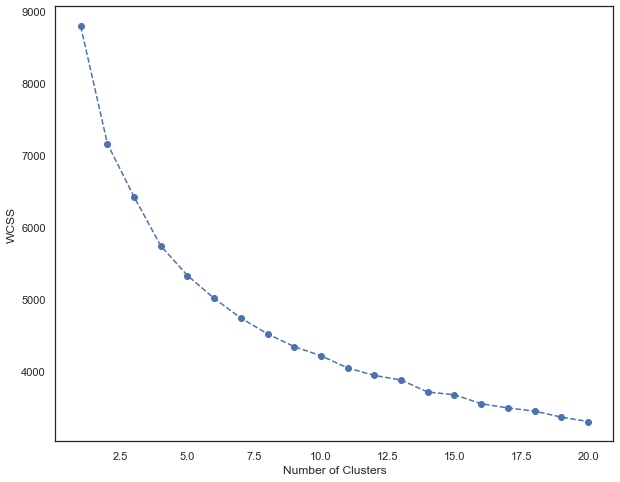

In [27]:
plt.figure(figsize = (10,8))
ax = plt.axes()
sns.set_style("white")
plt.plot(range(1, 21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\ANALYTICS\CLUSTERING\Flux_Reactions_Elbow_Plot.pdf', bbox_inches="tight")
plt.show()

In [28]:
# We have chosen four clusters, so we run K-means with number of clusters equals four.
# Same initializer 
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++')

In [29]:
# Fit with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
y_kmeans = kmeans_pca.fit_predict(scores_pca)

In [31]:
y_kmeans

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [32]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
dt_pca_kmeans = pd.concat([dt.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
dt_pca_kmeans.columns.values[-17:] = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17']
# The last column we add contains the pca k-means clustering labels.
dt_pca_kmeans['Segment'] = kmeans_pca.labels_


In [33]:
dt_pca_kmeans

,HUG0_SYMBOL,FACOAL161,FACOAL226,FAOXC180x,FAOXC200180x,LPS2e,FAOXC22C20x,FAOXC5C5OHm,FOLR2,MTHFC,...,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,Segment
0,TCGA-05-4244-01,492.278261,7.079644,72.493260,72.493260,61.853054,73.132205,738.255400,108.397948,270.354130,...,-0.931817,-0.442894,0.434366,1.444180,-0.204619,-0.474968,0.018386,0.166263,-4.007850e-17,0
1,TCGA-05-4249-01,310.135139,9.551541,56.620656,56.620656,140.936419,56.620656,652.096490,48.449442,382.299940,...,0.353943,-0.261647,0.113552,0.064621,0.388562,0.071554,-0.034042,0.011355,-1.115207e-16,1
2,TCGA-05-4250-01,469.075416,7.079644,16.444642,16.444642,141.025689,16.444642,702.829700,96.069113,238.709350,...,-1.814618,0.879735,-0.162507,-0.020530,0.028634,-0.191389,-0.118105,0.088693,2.026495e-15,0
3,TCGA-05-4382-01,388.931756,2.566599,57.663478,57.663478,143.147092,57.663478,672.085332,45.966676,411.693304,...,0.217010,0.156664,0.553978,-0.696770,-0.097872,-0.059549,-0.114374,-0.038888,2.907186e-17,1
4,TCGA-05-4384-01,370.985877,14.063856,55.165456,55.165456,234.667633,55.165456,803.016266,94.298178,270.281991,...,0.323485,0.160205,-0.029607,0.256863,0.014555,-0.061867,-0.043110,0.005354,9.703510e-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,TCGA-NJ-A55O-01,414.746888,39.822528,85.618963,85.618963,36.750627,85.618963,982.765609,53.142165,471.778643,...,0.848104,-0.219291,0.431374,-0.359224,-0.152051,0.014376,0.003837,-0.006358,2.878804e-17,1
513,TCGA-NJ-A55R-01,417.138336,5.666023,58.185536,58.185536,155.813294,58.185536,681.128567,76.246064,333.915439,...,0.501561,0.374300,0.254847,-0.255740,-0.241362,-0.187958,-0.110211,-0.038537,-1.423668e-17,0
514,TCGA-NJ-A7XG-01,399.975731,10.625324,79.222673,79.222673,218.430669,79.222673,937.183116,87.093217,424.185618,...,-0.041554,0.031377,0.097414,0.277560,-0.199341,-0.016950,0.018069,-0.029626,-8.215780e-18,1
515,TCGA-O1-A52J-01,353.756675,31.685559,101.809065,101.809065,37.588203,101.809065,664.991168,35.862855,250.687797,...,0.445835,-0.028472,-0.146583,0.111368,0.054868,0.011506,-0.001940,-0.001517,-7.694822e-17,1


In [34]:
dt_pca_kmeans = dt_pca_kmeans.merge(z1,left_index=True,right_index=True)

In [35]:
dt_pca_kmeans

,HUG0_SYMBOL,FACOAL161,FACOAL226,FAOXC180x,FAOXC200180x,LPS2e,FAOXC22C20x,FAOXC5C5OHm,FOLR2,MTHFC,...,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,Segment,OverallSurvivalMonths_y
0,TCGA-05-4244-01,492.278261,7.079644,72.493260,72.493260,61.853054,73.132205,738.255400,108.397948,270.354130,...,-0.442894,0.434366,1.444180,-0.204619,-0.474968,0.018386,0.166263,-4.007850e-17,0,0.00
1,TCGA-05-4249-01,310.135139,9.551541,56.620656,56.620656,140.936419,56.620656,652.096490,48.449442,382.299940,...,-0.261647,0.113552,0.064621,0.388562,0.071554,-0.034042,0.011355,-1.115207e-16,1,50.03
2,TCGA-05-4250-01,469.075416,7.079644,16.444642,16.444642,141.025689,16.444642,702.829700,96.069113,238.709350,...,0.879735,-0.162507,-0.020530,0.028634,-0.191389,-0.118105,0.088693,2.026495e-15,0,3.98
3,TCGA-05-4382-01,388.931756,2.566599,57.663478,57.663478,143.147092,57.663478,672.085332,45.966676,411.693304,...,0.156664,0.553978,-0.696770,-0.097872,-0.059549,-0.114374,-0.038888,2.907186e-17,1,19.94
4,TCGA-05-4384-01,370.985877,14.063856,55.165456,55.165456,234.667633,55.165456,803.016266,94.298178,270.281991,...,0.160205,-0.029607,0.256863,0.014555,-0.061867,-0.043110,0.005354,9.703510e-17,0,13.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,TCGA-NJ-A55O-01,414.746888,39.822528,85.618963,85.618963,36.750627,85.618963,982.765609,53.142165,471.778643,...,-0.219291,0.431374,-0.359224,-0.152051,0.014376,0.003837,-0.006358,2.878804e-17,1,0.43
513,TCGA-NJ-A55R-01,417.138336,5.666023,58.185536,58.185536,155.813294,58.185536,681.128567,76.246064,333.915439,...,0.374300,0.254847,-0.255740,-0.241362,-0.187958,-0.110211,-0.038537,-1.423668e-17,0,19.81
514,TCGA-NJ-A7XG-01,399.975731,10.625324,79.222673,79.222673,218.430669,79.222673,937.183116,87.093217,424.185618,...,0.031377,0.097414,0.277560,-0.199341,-0.016950,0.018069,-0.029626,-8.215780e-18,1,20.27
515,TCGA-O1-A52J-01,353.756675,31.685559,101.809065,101.809065,37.588203,101.809065,664.991168,35.862855,250.687797,...,-0.028472,-0.146583,0.111368,0.054868,0.011506,-0.001940,-0.001517,-7.694822e-17,1,59.07


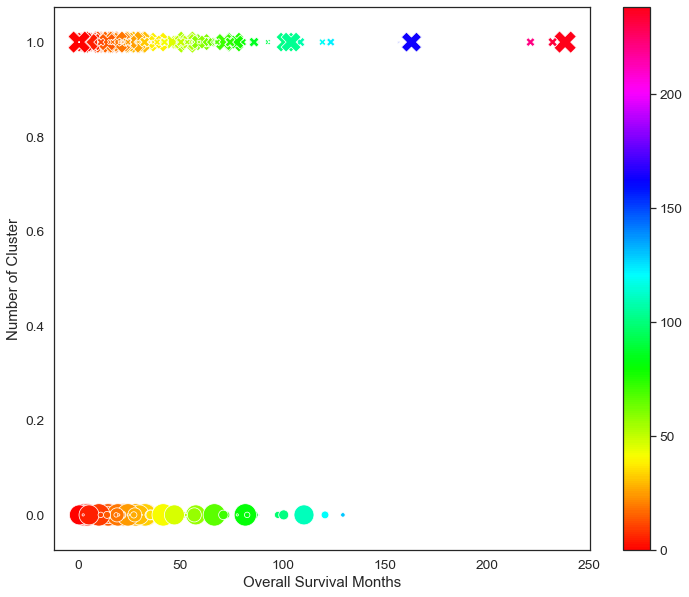

In [36]:
# Plot Graph
points_size = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]

plt.figure(figsize=(12,10))
sns.set_style("white")
with sns.plotting_context("notebook", font_scale=1.25):
    ax=sns.scatterplot(x="OverallSurvivalMonths_y", y="Segment",
                   data=dt_pca_kmeans,
                   hue="OverallSurvivalMonths_y",
                   style="Segment",
                   palette='hsv', 
                   s=points_size
                   )
    
    norm = plt.Normalize(dt_pca_kmeans['OverallSurvivalMonths_y'].min(), dt_pca_kmeans['OverallSurvivalMonths_y'].max())
    sm = plt.cm.ScalarMappable(cmap="hsv", norm=norm)
    sm.set_array([])
    
    # Remove the legend and add a colorbar
    ax.get_legend().remove()
    ax.figure.colorbar(sm)
    
    plt.xlabel("Overall Survival Months")
    plt.ylabel("Number of Cluster")
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\ANALYTICS\CLUSTERING\Flux_reactions_cluster_plot.pdf', bbox_inches="tight")

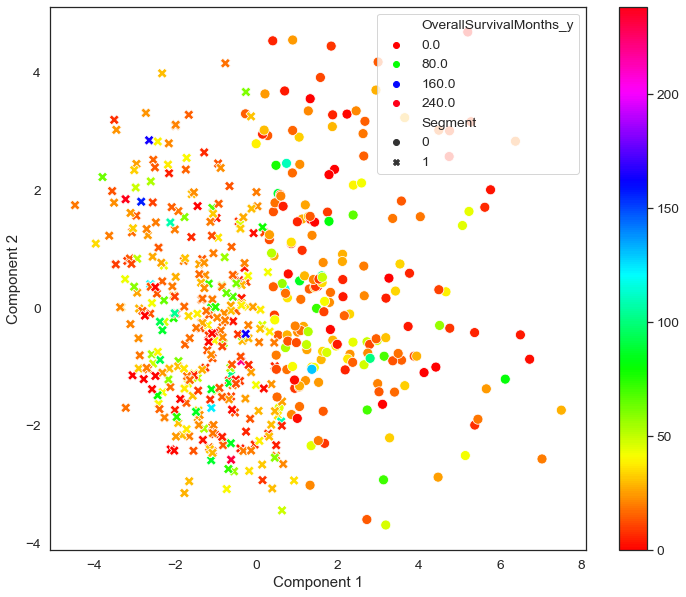

In [37]:
# Plot Graph
points_size=100 #increase scatter point size
plt.figure(figsize=(12,10))
sns.set_style("white")
with sns.plotting_context("notebook", font_scale=1.25):
    ax=sns.scatterplot(x="PC1", y="PC2",
                   data=dt_pca_kmeans,
                   hue="OverallSurvivalMonths_y",
                   style="Segment",
                   palette='hsv',
                   s=points_size,
                   
                   )
    
    norm = plt.Normalize(dt_pca_kmeans['OverallSurvivalMonths_y'].min(), dt_pca_kmeans['OverallSurvivalMonths_y'].max())
    sm = plt.cm.ScalarMappable(cmap="hsv", norm=norm)
    sm.set_array([])
    
    # Remove the legend and add a colorbar
    ax.get_legend()
    ax.figure.colorbar(sm)
    
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\ANALYTICS\CLUSTERING\Flux_reactions_survival_plot.pdf', bbox_inches="tight")